In [2]:
import Ws_model_generator as WS
import numpy as np
import networkx as nx

In [3]:
n = 50
p = np.linspace(0, 1, 10)
# k = [2 * val for val in range(1, 25)]

In [4]:
szeged_ind = {}
normalised_szeged_ind = {}

for k_val in range(1, int(n/2)):
    k = 2 * k_val
    wsg = WS.Ws_generator(n, k)
    szeged_ind[k] = {}
    normalised_szeged_ind[k] = {}
    for p_val in p:
        G1 = wsg.rewiring_ws(p_val)
        if not nx.is_connected(G1):
            print("shit the graph is not connected for p_val:", p_val)
            break
        C_u, C_v = WS.neighbourhood_values_generator(G1)
        # A1 = 1/(G1.number_of_nodes() * G1.number_of_edges() * nx.diameter(G1))
        A1 = 1/(G1.number_of_edges() *  nx.diameter(G1))
        szeged_ind[k][p_val] = np.sum(np.dot(C_u, C_v))
        normalised_szeged_ind[k][p_val] = szeged_ind[k][p_val] * A1

In [5]:
def interchange_keys(dictionary):
    new_dictionary = {}

    for outer_key, inner_dict in dictionary.items():
        for inner_key, value in inner_dict.items():
            if inner_key not in new_dictionary:
                new_dictionary[inner_key] = {}

            new_dictionary[inner_key][outer_key] = value

    return new_dictionary

In [6]:
normalised_szeged_ind_1 = interchange_keys(normalised_szeged_ind)

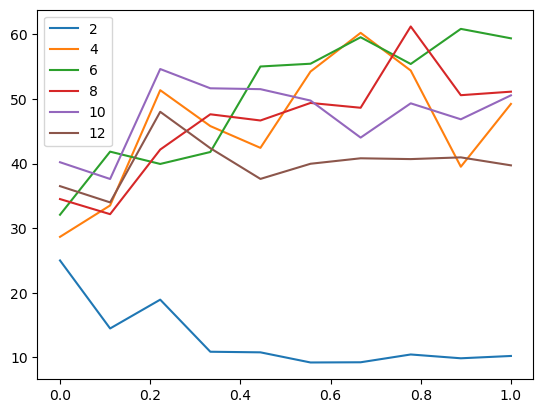

In [7]:
import matplotlib.pyplot as plt
i = 0
for k_values_1 in normalised_szeged_ind:

    i+=1

    keys = list(normalised_szeged_ind[k_values_1].keys())
    val = list(normalised_szeged_ind[k_values_1].values())
    plt.plot(keys, val, label = k_values_1)


    if i > 5:
        break
plt.legend()
plt.show()

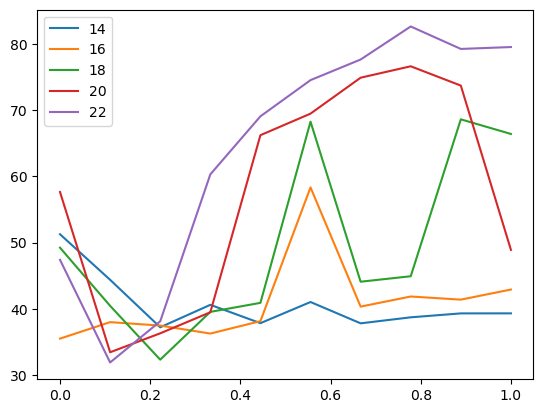

In [8]:
for val_12 in range(7, 12):
    keys = list(normalised_szeged_ind[val_12 * 2].keys())
    val = list(normalised_szeged_ind[val_12 * 2].values())
    plt.plot(keys, val, label = 2 * val_12)

plt.legend()
plt.show()

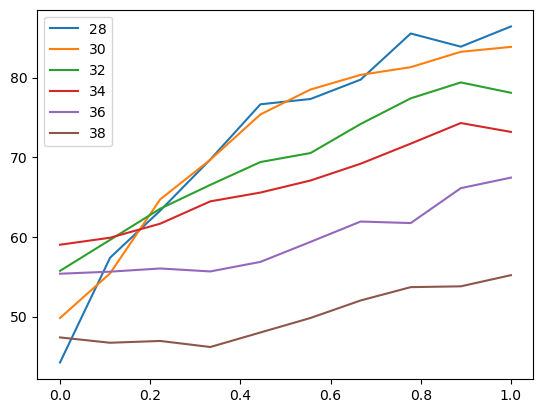

In [9]:
for val_12 in range(14, 20):
    keys = list(normalised_szeged_ind[val_12 * 2].keys())
    val = list(normalised_szeged_ind[val_12 * 2].values())
    plt.plot(keys, val, label = 2 * val_12)

plt.legend()
plt.show()

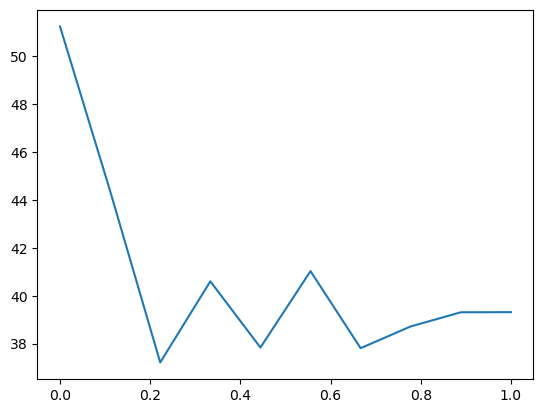

In [13]:
keys = list(normalised_szeged_ind[14].keys())
val = list(normalised_szeged_ind[14].values())
plt.plot(keys, val, label = 12)
plt.show()

In [5]:
import numpy as np

A = np.array([[1, 0, 1], [0 , 0 ,1 ], [1, 1, 0]])

In [6]:
A

array([[1, 0, 1],
       [0, 0, 1],
       [1, 1, 0]])

In [7]:
A - np.eye(3)

array([[ 0.,  0.,  1.],
       [ 0., -1.,  1.],
       [ 1.,  1., -1.]])